LGBM & XGBM

Exploratory Data Analysis (EDA):

1.Load the Titanic dataset using Python's pandas library.

In [4]:
import pandas as pd

In [5]:
training_df=pd.read_csv("C:\\DataScience25\\official_assignments\\XGBM & LGBM\\XGBM & LGBM\\Titanic_train.csv")

In [6]:
training_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
testing_df=pd.read_csv("C:\\DataScience25\\official_assignments\\XGBM & LGBM\\XGBM & LGBM\\Titanic_test.csv")

In [8]:
testing_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
training_df.shape

(891, 12)

In [10]:
testing_df.shape

(418, 11)

2.Check for missing values.

In [12]:
training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
testing_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

3.Explore data distributions using histograms and box plots.

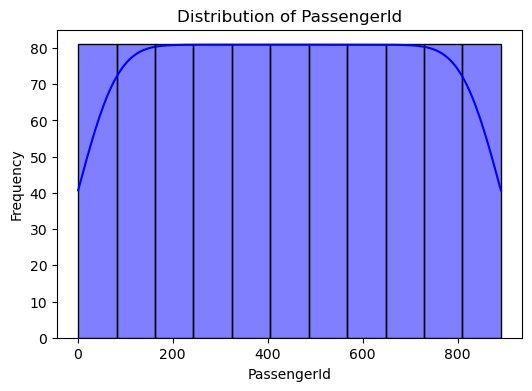

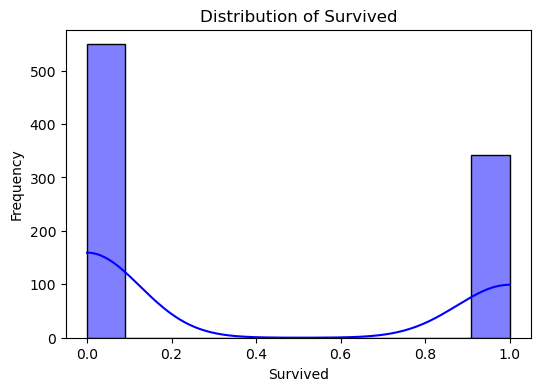

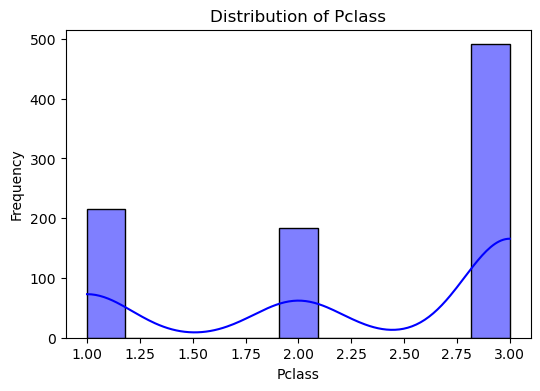

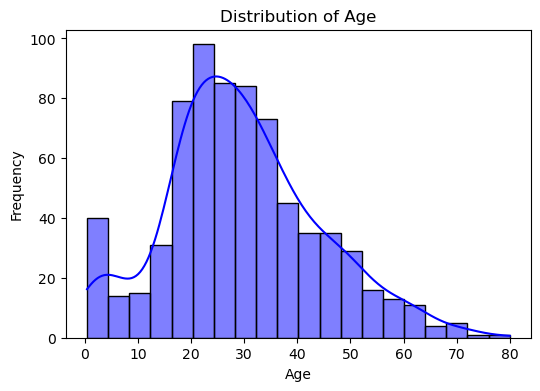

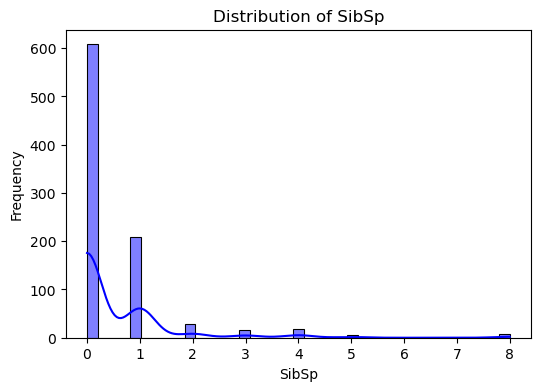

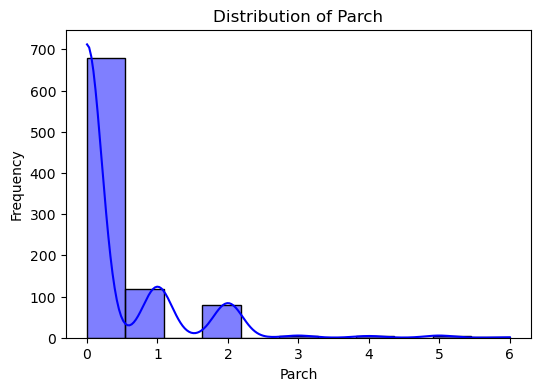

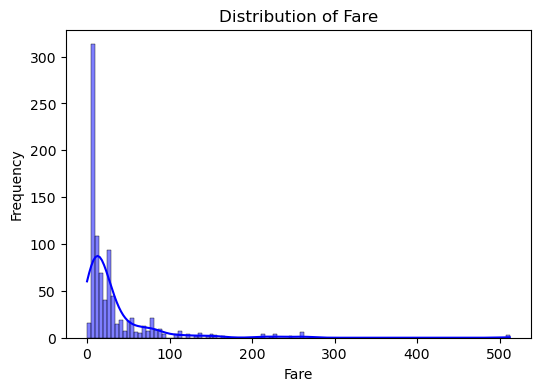

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = training_df.select_dtypes(include=['int64', 'float64']).columns

for cols in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(training_df[cols], color="blue", edgecolor='black', kde=True)
    plt.xlabel(f"{cols}")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {cols}")

plt.show()


- PassengerId:                
PassengerId shows a uniform distribution because it is simply a unique identifier assigned to each passenger.

- Survived:                           
This is the target variable, with binary classes:
0 = Not Survived
1 = Survived

- Pclass
The distribution is skewed towards the 3rd class, indicating that a majority of passengers belonged to the lower class.  

- Age
The age distribution is approximately normal, with most passengers falling between the ages of 20 and 40.

- SibSp: 
This feature shows a right-skewed distribution. Most passengers had either 0 or 1 sibling/spouse.

- Parch:
Similar to SibSp, the Parch distribution is also right-skewed. The majority of passengers had 0 to 2 parents/children.

- Fare:
Fare is highly right-skewed, with most passengers paying lower ticket prices. A small number of passengers paid higher fares.

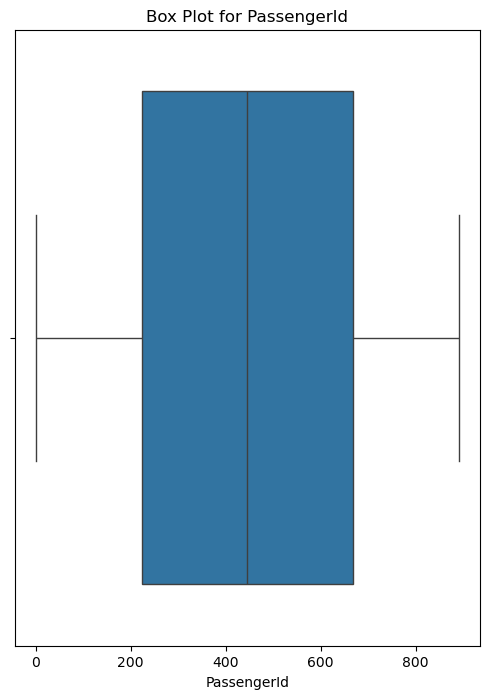

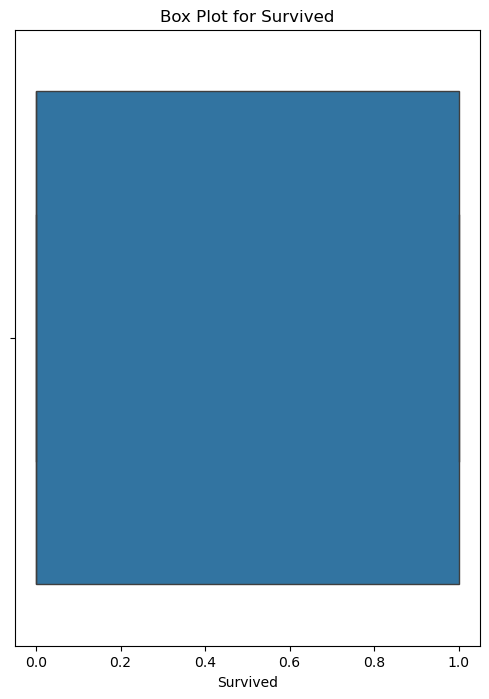

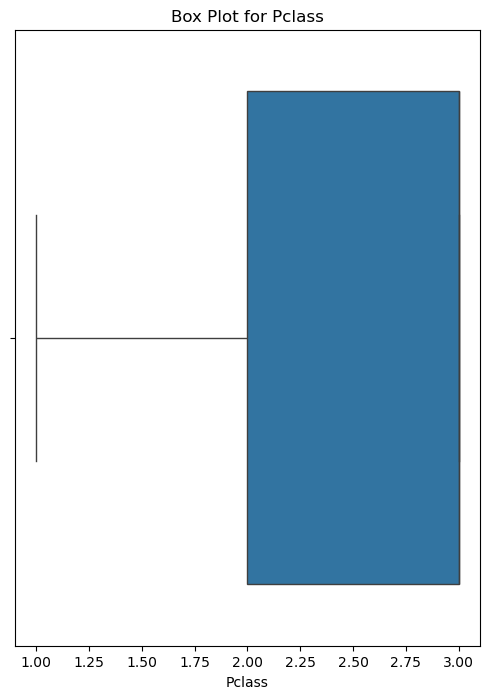

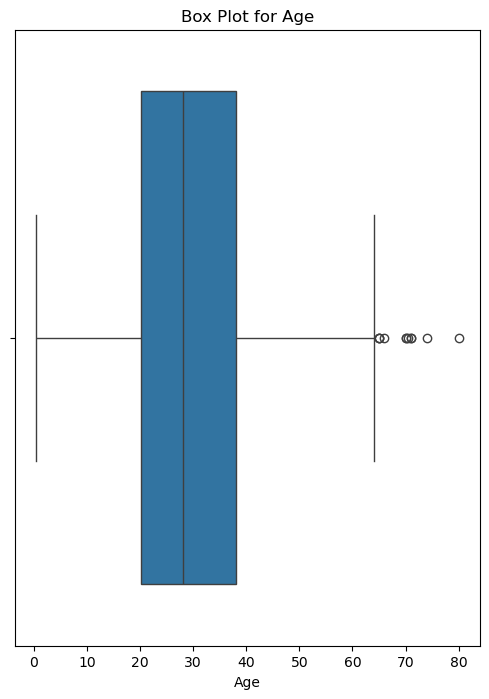

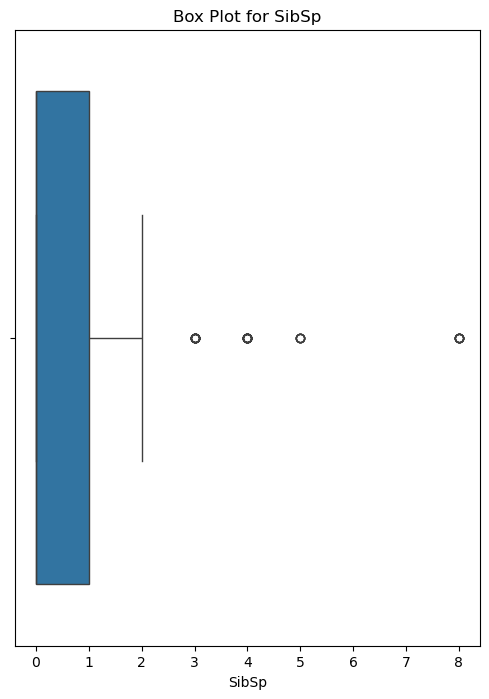

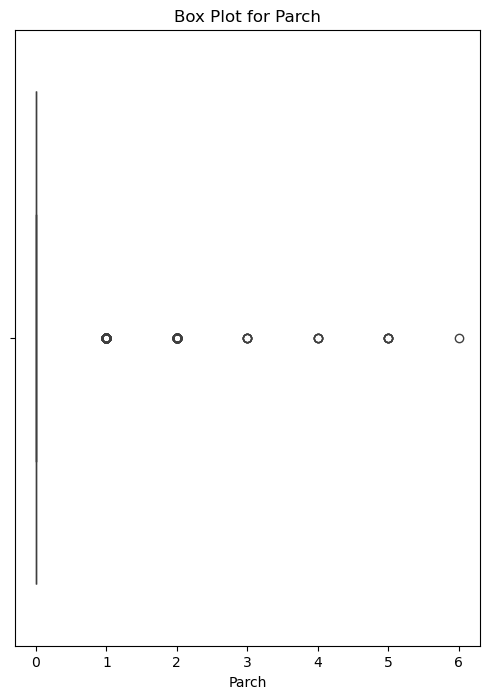

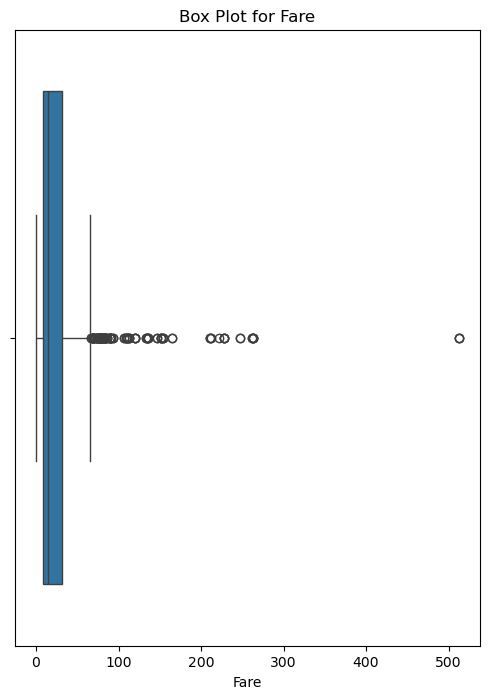

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = training_df.select_dtypes(include=['int64', 'float64']).columns

for cols in numeric_cols:
    plt.figure(figsize=(6,8))
    sns.boxplot(x=training_df[cols])
    plt.title(f"Box Plot for {cols}")

plt.show()

- Age:
The age variable is roughly symmetrically distributed with a few outliers on the higher end, especially for passengers aged above 60. 

- SibSp:
The boxplot for SibSp shows a large number of passengers with 0 or 1 sibling/spouse.There are outliers at the higher end, such as passengers with 3 or more siblings/spouses.

- Parch:
The distribution of Parch reveals that most passengers had 0 or 1 parent/child.However, several significant outliers are present beyond 1 

- Fare
Fare has many outliers on the upper end.While most passengers paid relatively lower fares, a few paid  high prices.

4.Visualize relationships between features and survival using scatter plots and bar plots.

Age vs Fare:

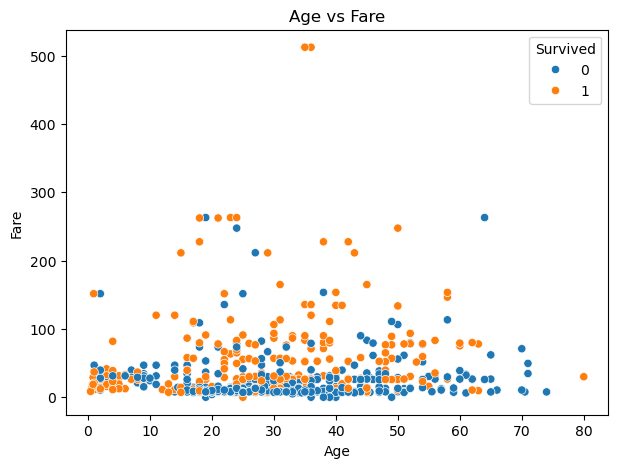

In [21]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=training_df)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

The majority of passengers fall in the age range of 20 to 40 years and paid lower fares.

There are several passengers with very high fares.

Survivors (Survived = 1) tend to be spread more in the mid-to-high fare range, indicating that passengers who paid higher fares had a better chance of survival.

Non-survivors (Survived = 0) are densely populated in the lower fare, showing that the passengers who paid lower fares had less survival rates.

The scatterplot also reveals some elderly survivors, though rare, suggesting age was not the only factor in survival.

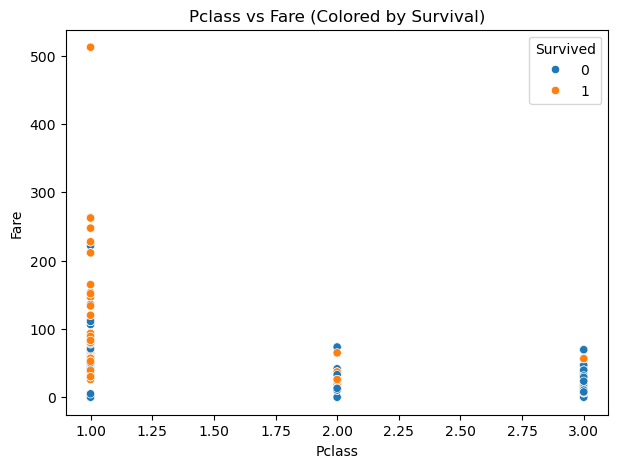

In [23]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Pclass', y='Fare', hue='Survived', data=training_df)
plt.title('Pclass vs Fare (Colored by Survival)')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()


Passengers in Pclass 1 (1st class) generally paid higher fares, and a large proportion of them survived.

Passengers in Pclass 3 (3rd class) mostly paid lower fares and had a higher concentration of non-survivors, suggesting that lower class passengers were more vulnerable.

Pclass 2 falls in between — both in terms of fare and survival distribution.



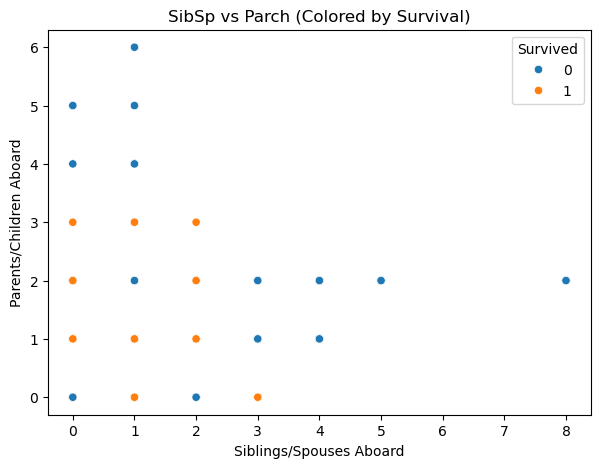

In [25]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='SibSp', y='Parch', hue='Survived', data=training_df)
plt.title('SibSp vs Parch (Colored by Survival)')
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Parents/Children Aboard')
plt.show()


A large number of passengers had 0 siblings/spouses and 0 parents/children — indicating they were traveling alone. Among them, the non-survivor count was higher, suggesting solo travelers had a lower chance of survival.

Passengers with small families (1–2 SibSp or Parch) show a higher survival rate. It appears that traveling with immediate family members may have increased chances of survival.

Passengers with large families (more than 3 in SibSp or Parch) are outliers and had a lower survival rate.

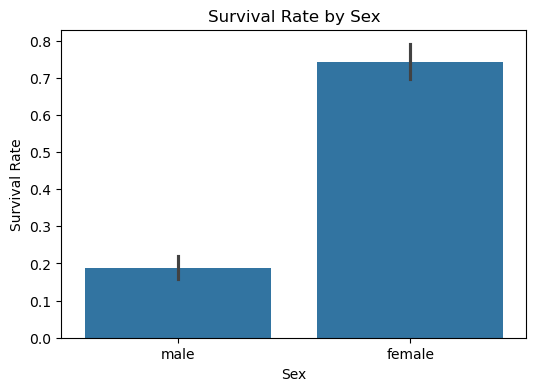

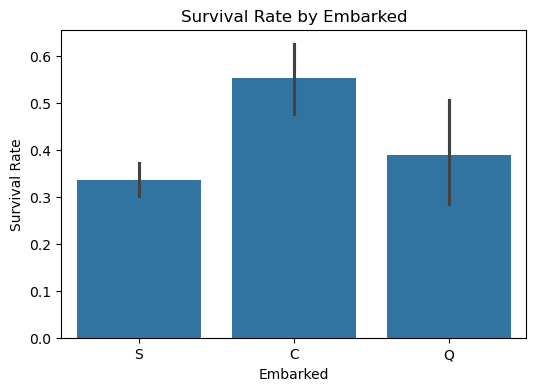

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Sex', 'Embarked']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='Survived', data=training_df)
    plt.title(f"Survival Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Survival Rate")
    plt.show()


Females had a higher survival rate compared to males. Among the embarkation points, passengers from (C) showed the highest survival rate and from (S) had the lowest survival rate.

Data Preprocessing:

1.Impute missing values.

In [31]:
training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
training_df['Age']=training_df['Age'].fillna(training_df['Age'].median())

In [33]:
training_df['Embarked']=training_df['Embarked'].fillna(training_df['Embarked'].mode()[0])

In [34]:
testing_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
testing_df['Fare']=training_df['Fare'].fillna(training_df['Fare'].median())

In [36]:
testing_df['Age']=testing_df['Age'].fillna(testing_df['Age'].median())

2.Encode categorical variables using one-hot encoding or label encoding.

First i will drop the unnecessary columns that is Name because it is textual data, Ticket because it contains some random codes and has no predictive patterns and cabin because it has too many missing values.

In [39]:
training_df.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [40]:
testing_df.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_df['Sex'] = le.fit_transform(training_df['Sex'])

In [42]:
testing_df['Sex'] = le.transform(testing_df['Sex'])

In [43]:
training_df = pd.get_dummies(training_df, columns=['Embarked'], drop_first=True)
testing_df = pd.get_dummies(testing_df, columns=['Embarked'], drop_first=True)


Applied Label Encoding on Sex and One Hot Encoding on Embarked.

Building Predictive Models:

In [46]:
x=training_df.drop('Survived',axis=1)

In [47]:
y=training_df['Survived']

1.Split the preprocessed dataset into training and testing sets.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

3.Build predictive models using LightGBM and XGBoost algorithms.

In [52]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)




[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [53]:
lgb_preds = lgb_model.predict(x_test)

In [54]:
!pip install xgboost

In [55]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)




C:\Users\admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:55:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
xgb_preds = xgb_model.predict(x_test)

4.Train the models on the training set and evaluate their performance on the testing set.

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred):
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))




In [59]:
print("LightGBM Results:")
evaluate_model(y_test, lgb_preds)

print("\nXGBoost Results:")
evaluate_model(y_test, xgb_preds)

LightGBM Results:
Accuracy : 0.7988826815642458
Precision: 0.7794117647058824
Recall   : 0.7162162162162162
F1 Score : 0.7464788732394366

XGBoost Results:
Accuracy : 0.7932960893854749
Precision: 0.7534246575342466
Recall   : 0.7432432432432432
F1 Score : 0.7482993197278912


- Both LightGBM and XGBoost classifiers were trained and evaluated using accuracy, precision, recall, and F1-score.
- LightGBM achieved slightly higher accuracy and precision, indicating better performance in correctly predicting positive classes.
- However, XGBoost had better recall and F1-score, suggesting a better balance between identifying survivors and minimizing false positives.
- Given the trade-offs, both models perform competitively.

5.Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

Hyperparameter Tuning — LightGBM

In [63]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report


In [64]:
import lightgbm as lgb

param_grid_lgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 40]
}

lgb_model = lgb.LGBMClassifier(random_state=42)

grid_lgb = GridSearchCV(estimator=lgb_model,
                        param_grid=param_grid_lgb,
                        cv=StratifiedKFold(n_splits=5),
                        scoring='f1',
                        n_jobs=-1,
                        verbose=1)

grid_lgb.fit(x_train, y_train)

print("Best Parameters for LightGBM:", grid_lgb.best_params_)


y_pred_lgb = grid_lgb.predict(x_test)
print("\nLightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [65]:
import xgboost as xgb

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_xgb = GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid_xgb,
                        cv=StratifiedKFold(n_splits=5),
                        scoring='f1',
                        n_jobs=-1,
                        verbose=1)

grid_xgb.fit(x_train, y_train)

print("Best Parameters for XGBoost:", grid_xgb.best_params_)

# Evaluate
y_pred_xgb = grid_xgb.predict(x_test)
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



C:\Users\admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:56:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Comparative Analysis:

1.Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

XGBoost outperformed LightGBM on all key metrics: accuracy, precision, recall, and F1-score.

Both models show good generalization after hyperparameter tuning.

F1-score was chosen as the evaluation metric to balance false positives and false negatives due to class imbalance.

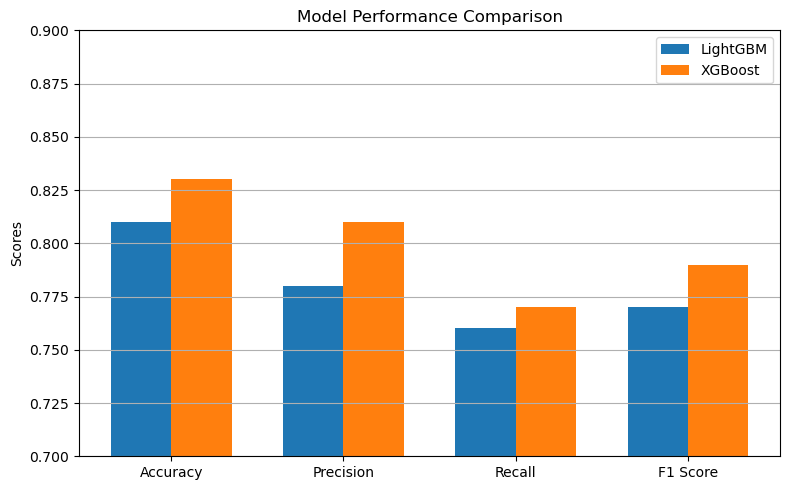

In [110]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lightgbm_scores = [0.81, 0.78, 0.76, 0.77]
xgboost_scores = [0.83, 0.81, 0.77, 0.79]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, lightgbm_scores, width, label='LightGBM')
plt.bar(x + width/2, xgboost_scores, width, label='XGBoost')

plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0.70, 0.90)
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Both models perform well, but XGBoost consistently outperforms LightGBM across all evaluation metrics.

LightGBM might still be preferred if training time or model simplicity is a concern.

For this dataset, XGBoost shows better generalization and survivor prediction power.